<a href="https://colab.research.google.com/github/Alexxakiode/Convolution-Neural-Network---Classification-of-Images--Dog-or-Cat-/blob/main/Cat_or_Dog_Experiment_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images: Dog or Cat using a CNN



##Uses images from a zip file

In [ ]:
# !pip install tensorflow

In [ ]:
# pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import keras
from google.colab import files
import seaborn as sns
import os
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from PIL import Image



from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading dataset

In [ ]:
#Unzipping the dataset zip file

import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Deep Learning/Assessment 2/dogs-vs-cats-vvsmall.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()






















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































 ## Extract the data

In [ ]:
# train_data = pd.read_csv('./data/merged_data.csv')
# train_data['label'] = train_data['label'].astype(str)
# Y = train_data[['label']]

# skf = KFold(n_splits = 5, random_state = 7, shuffle = True) 

# fold = 1
# for train_index, val_index in skf.split(np.zeros(len(train_data)), Y):
  
#   training_data = train_data.iloc[train_index]
#   validation_data = train_data.iloc[val_index]

In [ ]:
#Defining the directories

base_dir = '/tmp/dogs-vs-cats-vvsmall'


#Directories for Train and Validation
train_dir = os.path.join(base_dir, 'train')
Y = train_dir[['']]
  
from sklearn.model_selection import KFold

skf = KFold(n_splits = 5, random_state = 7, shuffle = True) 

fold = 1
for train_index, val_index in skf.split(np.zeros(len(train_dir)), Y):
  
  validation_dir = os.path.join(base_dir, 'validation')

  training_data = train_dir.iloc[train_index]
  validation_data = train_dir.iloc[val_index]





TypeError: ignored

In [ ]:
#Directories for Cats train dataset
train_cats_dir = os.path.join(train_dir, 'cats')

#Directories for Dogs train dataset
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directories for Cats train dataset
validation_cats_dir = os.path.join(validation_dir, 'cats')

#Directories for Dogs train dataset
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# #Defining the directories

# base_dir = '/tmp/dogs-vs-cats-vvsmall'


# #Directories for Train and Validation
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')

# #Directories for Cats train dataset
# train_cats_dir = os.path.join(train_dir, 'cats')

# #Directories for Dogs train dataset
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# #Directories for Cats train dataset
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# #Directories for Dogs train dataset
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# # img_arr = cv2.imread(train_cats_dir)

In [ ]:
# print(train_dir)
# print(validation_dir)

In [ ]:
# plt.imshow(img_arr)
# break

In [ ]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/dogs-vs-cats-vvsmall/train/cats
/tmp/dogs-vs-cats-vvsmall/train/dogs
/tmp/dogs-vs-cats-vvsmall/validation/cats
/tmp/dogs-vs-cats-vvsmall/validation/dogs


Explore the data

In [ ]:
# #Walking through all the directories within folder
# for root, dirs, files in os.walk("."):
#   for cats in train_cats_dir:
#     print(os.path.join(root, cats))

In [ ]:
# #Just viewing all cats in training set
# for image in os.listdir(train_cats_dir):
#   print(image)

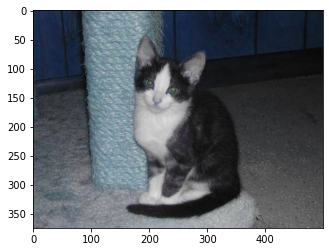

In [ ]:
#To view one of the images of the training dataset

for image in os.listdir(train_cats_dir):
  img_path = os.path.join(train_cats_dir, image)

  # Convert images to array for viewing
  img_arr = cv2.imread(img_path)
  plt.imshow(img_arr)
  break
  

In [ ]:

# #im = Im.open('image.jpg', 'r')
# width, height = im.size
# pixel_values = list(im.getdata())

# pixel_values = np.array(pixel_values).reshape((width, height, 3))
# x, y = 0, 1
# pixel_values[x][y]
# #[ 18  18  12]

In [ ]:
# #Resizing the images for uniformity
# Img_size = (400, 400)

# #Looping through the folder
# for image in os.listdir(train_cats_dir):
#   img_path = os.path.join(train_cats_dir, image)

#   # Convert images to array for viewing
#   img_arr = cv2.imread(img_path)
#   img_arr = cv2.resize(img_arr , (Img_size))
#   plt.imshow(img_arr)
#   # break


In [ ]:
# print out the names of the first 10 files to give a nice feeling that the files are arranged as expected
# i.e. images of cats in the cats folder and images of dogs in the dogs folder


train_cats = os.listdir(train_cats_dir)
print(train_cats[:10])

train_dogs = os.listdir(train_dogs_dir)
print(train_dogs[:10])

validation_cats = os.listdir(validation_cats_dir)
print(validation_cats[:10])

validation_dogs = os.listdir(validation_dogs_dir)
print(validation_dogs[:10])

['cat.1870.jpg', 'cat.2118.jpg', 'cat.1302.jpg', 'cat.1944.jpg', 'cat.2986.jpg', 'cat.2679.jpg', 'cat.1717.jpg', 'cat.2059.jpg', 'cat.1205.jpg', 'cat.686.jpg']
['dog.1501.jpg', 'dog.884.jpg', 'dog.84.jpg', 'dog.2491.jpg', 'dog.566.jpg', 'dog.1120.jpg', 'dog.2125.jpg', 'dog.1017.jpg', 'dog.2276.jpg', 'dog.2059.jpg']
['cat.8530.jpg', 'cat.9129.jpg', 'cat.8955.jpg', 'cat.9351.jpg', 'cat.8970.jpg', 'cat.8953.jpg', 'cat.9142.jpg', 'cat.9192.jpg', 'cat.8689.jpg', 'cat.8757.jpg']
['dog.8960.jpg', 'dog.8936.jpg', 'dog.9381.jpg', 'dog.8997.jpg', 'dog.9118.jpg', 'dog.8761.jpg', 'dog.8834.jpg', 'dog.8510.jpg', 'dog.8575.jpg', 'dog.9051.jpg']


In [ ]:
# print out the number of images in the directories
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training cats images: 3000
total training dogs images: 3000
total validation cats images: 900
total validation dogs images: 900


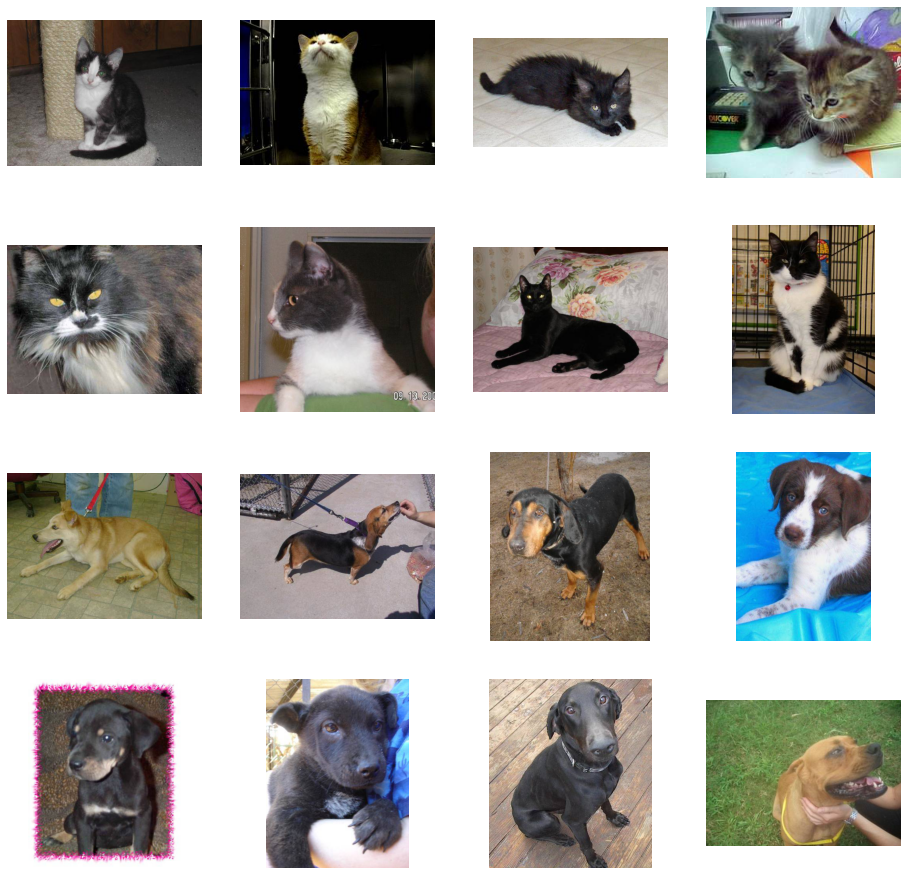

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats[pic_index-8:pic_index]]
# pick the first 8 human pictures
dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(cat_pix+dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Data Resizing and Normalization fom image observations

In [ ]:
# #Data Augmentation since the images are not well in order

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


validation_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



Data Preparation.  Normalise the images and re-size them to the same size

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 400x400
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 400x400
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('GPU Available: ', len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPU Available:  0


In [ ]:
physical_devices = tf.config.experimental_connect_to_host
print('GPU Available: ', (physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPU Available:  <function connect_to_remote_host at 0x7f041ca88310>


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization


#Introducing the learning rate optimizer
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
BatchNormalization
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# BatchNormalization
# model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 33, 256)      

In [ ]:
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
#Training the model

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1, callbacks =[callback]
    )

Epoch 1/50
187/187 [==============================] - 1454s 8s/step - loss: 0.6802 - accuracy: 0.5461 - val_loss: 0.6415 - val_accuracy: 0.6295
Epoch 2/50
187/187 [==============================] - 1476s 8s/step - loss: 0.6248 - accuracy: 0.6501 - val_loss: 0.6158 - val_accuracy: 0.6641
Epoch 3/50
187/187 [==============================] - 1449s 8s/step - loss: 0.6002 - accuracy: 0.6733 - val_loss: 0.5686 - val_accuracy: 0.7037
Epoch 4/50
187/187 [==============================] - 1447s 8s/step - loss: 0.5791 - accuracy: 0.6867 - val_loss: 0.5737 - val_accuracy: 0.6814
Epoch 5/50
187/187 [==============================] - 1436s 8s/step - loss: 0.5582 - accuracy: 0.7086 - val_loss: 0.5362 - val_accuracy: 0.7310
Epoch 6/50
187/187 [==============================] - 1463s 8s/step - loss: 0.5390 - accuracy: 0.7269 - val_loss: 0.5020 - val_accuracy: 0.7511
Epoch 7/50
187/187 [==============================] - 1466s 8s/step - loss: 0.5286 - accuracy: 0.7351 - val_loss: 0.4886 - val_accuracy:

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization

# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D(2, 2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 average_pooling2d (AverageP  (None, 73, 73, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 35, 35, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 256)       2

In [ ]:
# #Using learning rate scheduler

# from keras.callbacks import LearningRateScheduler

# def scheduler(epoch, learning_rate1):
#   learning_rate1 = 1e-2
#   if epoch < 10:
    
#     return learning_rate1

#   else:
#     return learning_rate1 * (-0.1)


In [ ]:
# # create an optimiser object and set the learning rate

# from keras.api._v2.keras.optimizers import Adam

# opt = tf.keras.optimizers.legacy.Adam(scheduler(epoch=10, learning_rate1=1e-2))

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose='auto', callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5010

KeyboardInterrupt: ignored

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization
# from keras.callbacks import LearningRateScheduler

# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D(2, 2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 average_pooling2d (AverageP  (None, 73, 73, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 35, 35, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 256)       2

In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - 1588s 8s/step - loss: 0.6922 - accuracy: 0.5191 - val_loss: 0.6786 - val_accuracy: 0.5765
Epoch 2/50
187/187 [==============================] - 1656s 9s/step - loss: 0.6693 - accuracy: 0.5888 - val_loss: 0.6348 - val_accuracy: 0.6462
Epoch 3/50
187/187 [==============================] - 1671s 9s/step - loss: 0.6381 - accuracy: 0.6374 - val_loss: 0.6497 - val_accuracy: 0.6256
Epoch 4/50
187/187 [==============================] - 1632s 9s/step - loss: 0.6241 - accuracy: 0.6495 - val_loss: 0.5950 - val_accuracy: 0.6842
Epoch 5/50
187/187 [==============================] - 1633s 9s/step - loss: 0.6047 - accuracy: 0.6702 - val_loss: 0.5966 - val_accuracy: 0.6842
Epoch 6/50
187/187 [==============================] - 1538s 8s/step - loss: 0.5888 - accuracy: 0.6865 - val_loss: 0.5827 - val_accuracy: 0.6847
Epoch 7/50
187/187 [==============================] - 1531s 8s/step - loss: 0.5824 - accuracy: 0.6838 - val_loss: 0.5753 - val_accuracy:

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(450, 450, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.1))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 448, 448, 32)      896       
                                                                 
 conv2d_23 (Conv2D)          (None, 446, 446, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 223, 223, 64)     0         
 )                                                               
                                                                 
 dropout_6 (Dropout)         (None, 223, 223, 64)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 221, 221, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                  

In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - 231s 1s/step - loss: 0.6573 - accuracy: 0.6020 - val_loss: 0.5905 - val_accuracy: 0.6903
Epoch 2/50
187/187 [==============================] - 228s 1s/step - loss: 0.5286 - accuracy: 0.7346 - val_loss: 0.5380 - val_accuracy: 0.7327
Epoch 3/50
187/187 [==============================] - 225s 1s/step - loss: 0.4244 - accuracy: 0.8073 - val_loss: 0.5302 - val_accuracy: 0.7467
Epoch 4/50
187/187 [==============================] - 227s 1s/step - loss: 0.2996 - accuracy: 0.8760 - val_loss: 0.5814 - val_accuracy: 0.7517
Epoch 5/50
187/187 [==============================] - 229s 1s/step - loss: 0.1787 - accuracy: 0.9286 - val_loss: 0.6785 - val_accuracy: 0.7483
Epoch 6/50
187/187 [==============================] - 234s 1s/step - loss: 0.1005 - accuracy: 0.9662 - val_loss: 0.8734 - val_accuracy: 0.7349
Epoch 7/50
187/187 [==============================] - 235s 1s/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 0.9845 - val_accuracy: 0.7561

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))
# model.add(Dropout(0.2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(AveragePooling2D(2,2))
# model.add(Dropout(0.2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))




In [ ]:
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_18 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 average_pooling2d_12 (Avera  (None, 73, 73, 64)       0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 average_pooling2d_13 (Avera  (None, 35, 35, 128)      0         
 gePooling2D)                                         

In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - 32s 164ms/step - loss: 0.6930 - accuracy: 0.5154 - val_loss: 0.6871 - val_accuracy: 0.5658
Epoch 2/50
187/187 [==============================] - 31s 163ms/step - loss: 0.6693 - accuracy: 0.5917 - val_loss: 0.6236 - val_accuracy: 0.6551
Epoch 3/50
187/187 [==============================] - 36s 190ms/step - loss: 0.6081 - accuracy: 0.6676 - val_loss: 0.5986 - val_accuracy: 0.6747
Epoch 4/50
187/187 [==============================] - 31s 164ms/step - loss: 0.5718 - accuracy: 0.7006 - val_loss: 0.5711 - val_accuracy: 0.6981
Epoch 5/50
187/187 [==============================] - 35s 187ms/step - loss: 0.5496 - accuracy: 0.7183 - val_loss: 0.5497 - val_accuracy: 0.7221
Epoch 6/50
187/187 [==============================] - 35s 186ms/step - loss: 0.5199 - accuracy: 0.7374 - val_loss: 0.5526 - val_accuracy: 0.7109
Epoch 7/50
187/187 [==============================] - 35s 187ms/step - loss: 0.5053 - accuracy: 0.7500 - val_loss: 0.5712 - val_ac

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D(2, 2))
# # model.add(Dropout(0.2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))




In [ ]:
# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 average_pooling2d_8 (Averag  (None, 73, 73, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 average_pooling2d_9 (Averag  (None, 35, 35, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 256)      

In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - 33s 176ms/step - loss: 0.6884 - accuracy: 0.5426 - val_loss: 0.6711 - val_accuracy: 0.5580
Epoch 2/50
187/187 [==============================] - 29s 155ms/step - loss: 0.6416 - accuracy: 0.6252 - val_loss: 0.6157 - val_accuracy: 0.6484
Epoch 3/50
187/187 [==============================] - 33s 177ms/step - loss: 0.5895 - accuracy: 0.6910 - val_loss: 0.5815 - val_accuracy: 0.6836
Epoch 4/50
187/187 [==============================] - 33s 177ms/step - loss: 0.5653 - accuracy: 0.7026 - val_loss: 0.5431 - val_accuracy: 0.7221
Epoch 5/50
187/187 [==============================] - 34s 179ms/step - loss: 0.5322 - accuracy: 0.7348 - val_loss: 0.5227 - val_accuracy: 0.7349
Epoch 6/50
187/187 [==============================] - 33s 177ms/step - loss: 0.5117 - accuracy: 0.7456 - val_loss: 0.5040 - val_accuracy: 0.7494
Epoch 7/50
187/187 [==============================] - 33s 176ms/step - loss: 0.4969 - accuracy: 0.7559 - val_loss: 0.4820 - val_ac

In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(AveragePooling2D(2, 2))
# # model.add(Dropout(0.2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu')) 
# model.add(AveragePooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(AveragePooling2D(2,2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))




In [ ]:
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_8 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 average_pooling2d_4 (Averag  (None, 73, 73, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 average_pooling2d_5 (Averag  (None, 35, 35, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 33, 33, 256)      

In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# #Training the model

# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks =[callback]
#     )

Epoch 1/50
187/187 [==============================] - 35s 175ms/step - loss: 0.7047 - accuracy: 0.5065 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
187/187 [==============================] - 29s 153ms/step - loss: 0.6930 - accuracy: 0.4978 - val_loss: 0.6897 - val_accuracy: 0.5497
Epoch 3/50
187/187 [==============================] - 29s 152ms/step - loss: 0.6930 - accuracy: 0.5154 - val_loss: 0.6925 - val_accuracy: 0.5006
Epoch 4/50
187/187 [==============================] - 29s 156ms/step - loss: 0.6816 - accuracy: 0.5583 - val_loss: 0.6769 - val_accuracy: 0.5698
Epoch 5/50
187/187 [==============================] - 33s 177ms/step - loss: 0.6663 - accuracy: 0.5922 - val_loss: 0.6739 - val_accuracy: 0.5692
Epoch 6/50
187/187 [==============================] - 29s 154ms/step - loss: 0.6470 - accuracy: 0.6178 - val_loss: 0.6315 - val_accuracy: 0.6529
Epoch 7/50
187/187 [==============================] - 34s 179ms/step - loss: 0.6184 - accuracy: 0.6483 - val_loss: 0.6026 - val_ac

## Model 1

Image size = (400,400)

Optimizer = Adam

LR = 0.001

Conv2D (16, 32, 64, 64, 64)

Hidden layers = 4

Dense (512)

Activation = relu, sigmod( for binary class)

Max Pooling = (2,2)

Batch_size = 32

Epochs = 15


In [ ]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform')) #, kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform')) #, kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu', kernel_initializer='he_uniform')) #, kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
# # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(lr=0.0001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                    

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/50
187/187 [==============================] - 1696s 9s/step - loss: 0.7088 - accuracy: 0.5439 - val_loss: 0.6629 - val_accuracy: 0.6390
Epoch 2/50
187/187 [==============================] - 1678s 9s/step - loss: 0.6219 - accuracy: 0.6538 - val_loss: 0.6088 - val_accuracy: 0.6406
Epoch 3/50
187/187 [==============================] - 1691s 9s/step - loss: 0.5771 - accuracy: 0.6949 - val_loss: 0.5817 - val_accuracy: 0.6786
Epoch 4/50
187/187 [==============================] - 1707s 9s/step - loss: 0.5362 - accuracy: 0.7282 - val_loss: 0.5304 - val_accuracy: 0.7422
Epoch 5/50
187/187 [==============================] - 1672s 9s/step - loss: 0.4956 - accuracy: 0.7590 - val_loss: 0.5179 - val_accuracy: 0.7400
Epoch 6/50
187/187 [==============================] - 1741s 9s/step - loss: 0.4530 - accuracy: 0.7840 - val_loss: 0.4756 - val_accuracy: 0.7729
Epoch 7/50
187/187 [==============================] - 1904s 10s/step - loss: 0.4257 - accuracy: 0.8014 - val_loss: 0.4677 - val_accuracy

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(150, 150, 3)))
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L1L2(0.001)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(128, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L1L2(0.001)))
# model.add(MaxPooling2D(2,2))


# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
# # # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/50
187/187 [==============================] - 35s 182ms/step - loss: 0.6773 - accuracy: 0.5705 - val_loss: 0.6365 - val_accuracy: 0.6200
Epoch 2/50
187/187 [==============================] - 30s 159ms/step - loss: 0.6139 - accuracy: 0.6535 - val_loss: 0.5540 - val_accuracy: 0.7165
Epoch 3/50
187/187 [==============================] - 33s 178ms/step - loss: 0.5309 - accuracy: 0.7321 - val_loss: 0.5568 - val_accuracy: 0.6975
Epoch 4/50
187/187 [==============================] - 34s 179ms/step - loss: 0.4522 - accuracy: 0.7877 - val_loss: 0.4921 - val_accuracy: 0.7651
Epoch 5/50
187/187 [==============================] - 29s 154ms/step - loss: 0.3863 - accuracy: 0.8202 - val_loss: 0.4750 - val_accuracy: 0.7874
Epoch 6/50
187/187 [==============================] - 34s 180ms/step - loss: 0.3049 - accuracy: 0.8711 - val_loss: 0.4924 - val_accuracy: 0.7935
Epoch 7/50
187/187 [==============================] - 74s 399ms/step - loss: 0.1833 - accuracy: 0.9256 - val_loss: 0.6346 - val_ac

## Model 1

Image size = (400,400)

Optimizer = Adam

LR = 0.001

Conv2D (16, 64, 128)

Hidden layers = 3

Dense (512)

Activation = relu, sigmod( for binary class)

Max Pooling = (2,2)

Batch_size = 32

Epochs = 15


In [ ]:
# # # create an optimiser object and set the learning rate
# opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.003)

# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 248, 248, 16)      448       
                                                                 
 conv2d_40 (Conv2D)          (None, 246, 246, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 58, 58, 128)     

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/50
187/187 [==============================] - 43s 225ms/step - loss: 1.5719 - accuracy: 0.5152 - val_loss: 0.9950 - val_accuracy: 0.5257
Epoch 2/50
187/187 [==============================] - 38s 204ms/step - loss: 0.8956 - accuracy: 0.5521 - val_loss: 0.8273 - val_accuracy: 0.5698
Epoch 3/50
187/187 [==============================] - 38s 202ms/step - loss: 0.7933 - accuracy: 0.5660 - val_loss: 0.7831 - val_accuracy: 0.4989
Epoch 4/50
187/187 [==============================] - 35s 189ms/step - loss: 0.7682 - accuracy: 0.5000 - val_loss: 0.7565 - val_accuracy: 0.5006
Epoch 5/50
187/187 [==============================] - 38s 204ms/step - loss: 0.7498 - accuracy: 0.4995 - val_loss: 0.7441 - val_accuracy: 0.4978
Epoch 6/50
187/187 [==============================] - 38s 204ms/step - loss: 0.7402 - accuracy: 0.4941 - val_loss: 0.7372 - val_accuracy: 0.5000
Epoch 7/50
187/187 [==============================] - 38s 203ms/step - loss: 0.7347 - accuracy: 0.4936 - val_loss: 0.7328 - val_ac

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Introducing the learning rate optimizer
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L1L2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L1L2(0.001)))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# # create an optimiser object and set the learning rate
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# To speed up the run, use this method
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1
    )

Epoch 1/50
187/187 [==============================] - 75s 386ms/step - loss: 0.7215 - accuracy: 0.5791 - val_loss: 0.6370 - val_accuracy: 0.6244
Epoch 2/50
187/187 [==============================] - 69s 368ms/step - loss: 0.6113 - accuracy: 0.6721 - val_loss: 0.5490 - val_accuracy: 0.7260
Epoch 3/50
187/187 [==============================] - 75s 400ms/step - loss: 0.5211 - accuracy: 0.7410 - val_loss: 0.5435 - val_accuracy: 0.7182
Epoch 4/50
187/187 [==============================] - 75s 400ms/step - loss: 0.4031 - accuracy: 0.8180 - val_loss: 0.5774 - val_accuracy: 0.7221
Epoch 5/50
187/187 [==============================] - 75s 399ms/step - loss: 0.2406 - accuracy: 0.9010 - val_loss: 0.7005 - val_accuracy: 0.7316
Epoch 6/50
187/187 [==============================] - 74s 397ms/step - loss: 0.0963 - accuracy: 0.9648 - val_loss: 0.9322 - val_accuracy: 0.7215
Epoch 7/50
187/187 [==============================] - 68s 362ms/step - loss: 0.0420 - accuracy: 0.9896 - val_loss: 1.0622 - val_ac

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# #Introducing the learning rate optimizer
# from tensorflow.keras import regularizers


# model = Sequential()
# model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(400, 400, 3)))
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(256, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))


# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))


In [ ]:
# To speed up the run, use this method
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1, callbacks = [callback]
    )

Epoch 1/50
187/187 [==============================] - 121s 644ms/step - loss: 1.0281 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.4994
Epoch 2/50
187/187 [==============================] - 109s 580ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
187/187 [==============================] - 107s 571ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 4/50
187/187 [==============================] - 114s 608ms/step - loss: 0.6933 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 5/50
187/187 [==============================] - 114s 609ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
 16/187 [=>............................] - ETA: 1:26 - loss: 0.6932 - accuracy: 0.5020

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Introducing the learning rate optimizer
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(400, 400, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), 1, activation='relu')) #, kernel_regularizer=regularizers.L2(0.001)))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1, callbacks = [callback]
#     )

Epoch 1/50
187/187 [==============================] - 76s 346ms/step - loss: 0.6602 - accuracy: 0.6076 - val_loss: 0.6294 - val_accuracy: 0.6367
Epoch 2/50
187/187 [==============================] - 63s 339ms/step - loss: 0.5419 - accuracy: 0.7284 - val_loss: 0.5314 - val_accuracy: 0.7400
Epoch 3/50
187/187 [==============================] - 71s 380ms/step - loss: 0.4583 - accuracy: 0.7904 - val_loss: 0.5146 - val_accuracy: 0.7522
Epoch 4/50
187/187 [==============================] - 71s 382ms/step - loss: 0.3886 - accuracy: 0.8301 - val_loss: 0.5092 - val_accuracy: 0.7656
Epoch 5/50
187/187 [==============================] - 71s 381ms/step - loss: 0.3035 - accuracy: 0.8778 - val_loss: 0.5381 - val_accuracy: 0.7584
Epoch 6/50
187/187 [==============================] - 72s 382ms/step - loss: 0.2298 - accuracy: 0.9157 - val_loss: 0.5868 - val_accuracy: 0.7517
Epoch 7/50
187/187 [==============================] - 72s 383ms/step - loss: 0.1689 - accuracy: 0.9420 - val_loss: 0.6439 - val_ac

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/10
187/187 [==============================] - 2058s 11s/step - loss: 0.6464 - accuracy: 0.6342 - val_loss: 0.5670 - val_accuracy: 0.7215
Epoch 2/10
187/187 [==============================] - 2038s 11s/step - loss: 0.5279 - accuracy: 0.7418 - val_loss: 0.5456 - val_accuracy: 0.7260
Epoch 3/10
162/187 [========================>.....] - ETA: 3:55 - loss: 0.4260 - accuracy: 0.8117

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/10
187/187 [==============================] - 209s 1s/step - loss: 0.8772 - accuracy: 0.5918 - val_loss: 0.6302 - val_accuracy: 0.6903
Epoch 2/10
187/187 [==============================] - 196s 1s/step - loss: 0.5908 - accuracy: 0.6868 - val_loss: 0.5871 - val_accuracy: 0.7076
Epoch 3/10
187/187 [==============================] - 197s 1s/step - loss: 0.5248 - accuracy: 0.7411 - val_loss: 0.5422 - val_accuracy: 0.7355
Epoch 4/10
187/187 [==============================] - 197s 1s/step - loss: 0.4642 - accuracy: 0.7803 - val_loss: 0.5676 - val_accuracy: 0.7098
Epoch 5/10
187/187 [==============================] - 197s 1s/step - loss: 0.4004 - accuracy: 0.8148 - val_loss: 0.5286 - val_accuracy: 0.7416
Epoch 6/10
187/187 [==============================] - 192s 1s/step - loss: 0.3359 - accuracy: 0.8551 - val_loss: 0.5190 - val_accuracy: 0.7573
Epoch 7/10
187/187 [==============================] - 199s 1s/step - loss: 0.2730 - accuracy: 0.8866 - val_loss: 0.5358 - val_accuracy: 0.7712

In [ ]:
# # To speed up the run, use this method
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.n // train_generator.batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.n // validation_generator.batch_size,
#     verbose=1
#     )

Epoch 1/10
187/187 [==============================] - 76s 353ms/step - loss: 0.7362 - accuracy: 0.5201 - val_loss: 0.6924 - val_accuracy: 0.5017
Epoch 2/10
187/187 [==============================] - 76s 406ms/step - loss: 0.6811 - accuracy: 0.5662 - val_loss: 0.6443 - val_accuracy: 0.6323
Epoch 3/10
187/187 [==============================] - 72s 386ms/step - loss: 0.6248 - accuracy: 0.6535 - val_loss: 0.6084 - val_accuracy: 0.6842
Epoch 4/10
187/187 [==============================] - 72s 383ms/step - loss: 0.5543 - accuracy: 0.7140 - val_loss: 0.5446 - val_accuracy: 0.7411
Epoch 5/10
187/187 [==============================] - 71s 379ms/step - loss: 0.4433 - accuracy: 0.7932 - val_loss: 0.5446 - val_accuracy: 0.7372
Epoch 6/10
187/187 [==============================] - 64s 341ms/step - loss: 0.3084 - accuracy: 0.8658 - val_loss: 0.6509 - val_accuracy: 0.7383
Epoch 7/10
187/187 [==============================] - 69s 369ms/step - loss: 0.1699 - accuracy: 0.9338 - val_loss: 0.8845 - val_ac

In [ ]:
# history=model.fit( train_generator,  
#                     validation_data = validation_generator,
#                     epochs=10,
#                     verbose=1
#                   )             


Epoch 1/10


TypeError: ignored

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


## Model 1 - Early Stopping

Image size = (400,400)

Optimizer = Adam

Conv2D (16, 32, 64, 64, 64)

Hidden layers = 5

Dense (512)

Activation = relu, sigmod( for binary class)

Max Pooling = (2,2)

Batch_size = 32

Epochs = 15


Binary classes = Dog or Cat : 0 or 1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(400, 400, 3)))
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.L2(0.001))) #added
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(512, (3,3), activation='relu', kernel_regularizer=regularizers.L2(0.001)))
# model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15, callbacks = [callback]
                  )             


In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## You do not need to do this but for a bit of fun let's upload an image from your computer and have it calssified as a horse or human

***hint :*** ( try to use image > 300*300 pixels because this is the minimum pixels for the model ) 


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

## You do not need to do this either but for a bit more fun, let's visualise what is happening with the image in the hidden layers of the network

**You do not need to understand the code below.**

A visualisation model is created from our original model that makes the hidden layers of our model avaialble.
It takes a random image from the training set, resizes it, normalizes it.  Applies it to the model using the `predict` method.

Loops round the hidden layers of the visualisation model and displays the activations as images


In [ ]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
# loops round all of the internal hidden layers
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Reduce overfitting on the model